#### Analysis to find interesting differences between Autobahnbrücken and Bundesstraßenbrücken

This script compared Autobahnbrücken (`Zugeordneteter Sachverhalt vereinfacht` = `A`) and Bundesstraßenbrücken (`Zugeordneter Sachverhalt vereinfacht` = `B`). So far, there is no big difference in the averge `Zustandsnote` per year (corrected for the number of bridges). 

Feel free to add further cells and further analysis. 

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data
data = pd.read_csv('../data/reduced_bridge_statistic_germany.csv', sep=';')

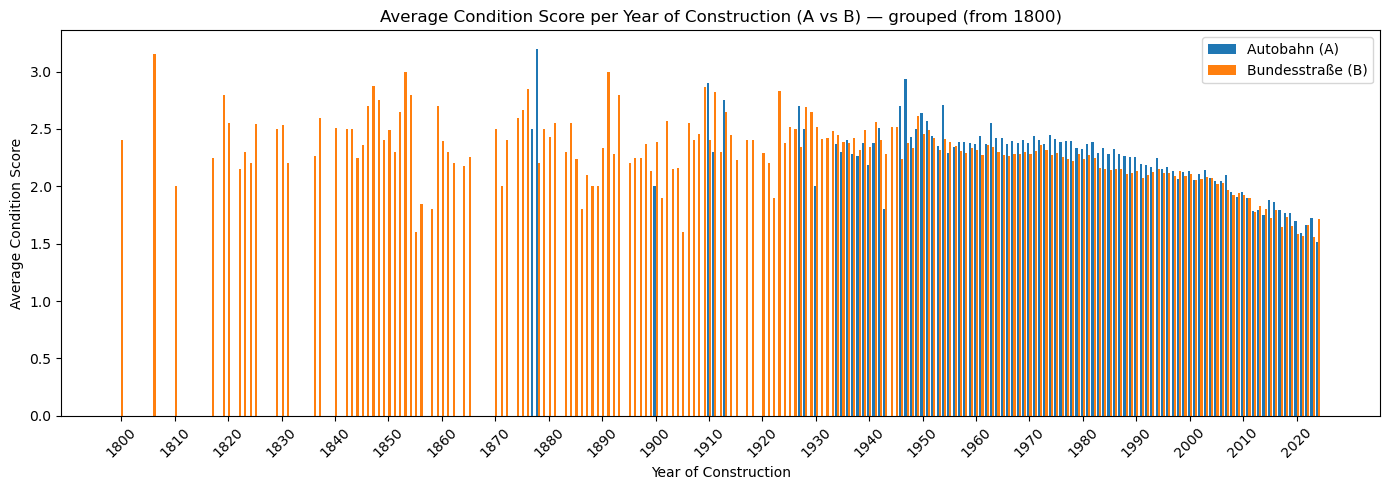

In [3]:
# filter rows with required values
df = data.dropna(subset=['Baujahr Überbau','Zustandsnote','Zugeordneter Sachverhalt vereinfacht']).copy()

# compute mean condition per year and type (A/B)
grouped = df.groupby(['Baujahr Überbau','Zugeordneter Sachverhalt vereinfacht'])['Zustandsnote'].mean().unstack()

# define full year range starting at 1800
max_year = int(grouped.index.max()) if pd.notna(grouped.index.max()) else 2025
if max_year < 1800:
    max_year = 2025
full_years = np.arange(1800, max_year+1)

# reindex to include all years (missing years will be NaN)
grouped = grouped.reindex(full_years)

# get series for A and B (NaN if missing)
values_A = grouped['A'] if 'A' in grouped.columns else pd.Series(np.nan, index=full_years)
values_B = grouped['B'] if 'B' in grouped.columns else pd.Series(np.nan, index=full_years)

# positions for grouped bars
x = np.arange(len(full_years))
width = 0.4

plt.figure(figsize=(14,5))
plt.bar(x - width/2, values_A, width, label='Autobahn (A)', color='C0')
plt.bar(x + width/2, values_B, width, label='Bundesstraße (B)', color='C1')

# readability: show every 10th year tick
tick_idx = np.arange(0, len(full_years), 10)
plt.xticks(tick_idx, full_years[tick_idx], rotation=45)

plt.xlabel('Year of Construction')
plt.ylabel('Average Condition Score')
plt.title('Average Condition Score per Year of Construction (A vs B) — grouped (from 1800)')
plt.legend()
plt.tight_layout()
plt.show()

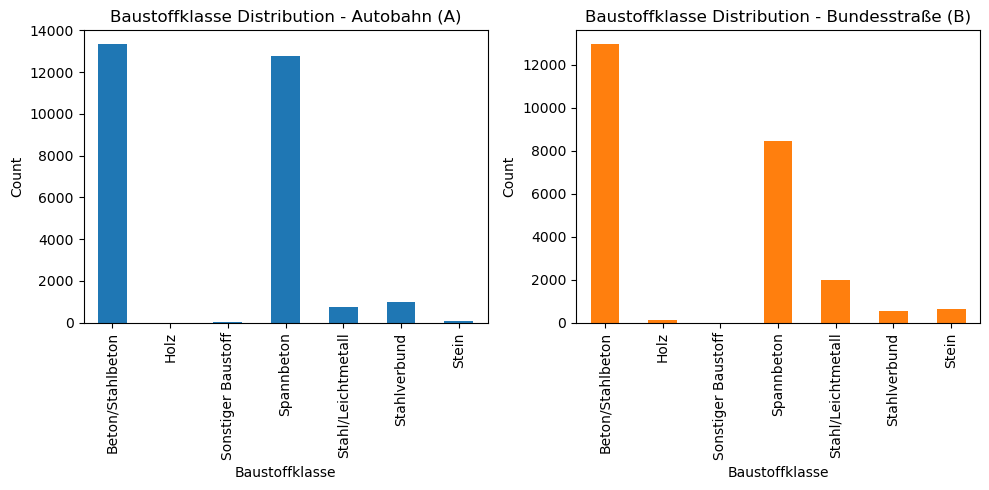

Percentage of bridges for each Baustoffklasse for A:
Baustoffklasse
Beton/Stahlbeton      47.743136
Spannbeton            45.752944
Stahlverbund           3.568744
Stahl/Leichtmetall     2.641658
Stein                  0.254143
Sonstiger Baustoff     0.028636
Holz                   0.010738
Name: proportion, dtype: float64

Percentage of bridges for each Baustoffklasse for B:
Baustoffklasse
Beton/Stahlbeton      52.607424
Spannbeton            34.262042
Stahl/Leichtmetall     7.988791
Stein                  2.497766
Stahlverbund           2.193161
Holz                   0.438632
Sonstiger Baustoff     0.012184
Name: proportion, dtype: float64


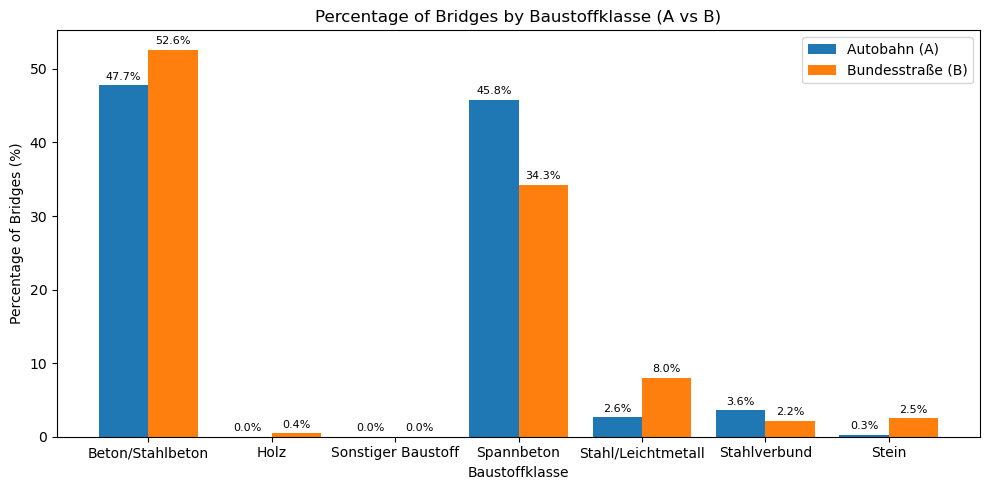

In [ ]:
# plot Baustoffklasse for A and B separated

# filter rows with required values
df = data.dropna(subset=['Baustoffklasse','Zugeordneter Sachverhalt vereinfacht']).copy()

# split into A and B
df_A = df[df['Zugeordneter Sachverhalt vereinfacht'] == 'A']
df_B = df[df['Zugeordneter Sachverhalt vereinfacht'] == 'B']

# plot distribution of Baustoffklasse for A
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_A['Baustoffklasse'].value_counts().sort_index().plot(kind='bar', color='C0')
plt.xlabel('Baustoffklasse')
plt.ylabel('Count')
plt.title('Baustoffklasse Distribution - Autobahn (A)') 
# plot distribution of Baustoffklasse for B
plt.subplot(1,2,2)
df_B['Baustoffklasse'].value_counts().sort_index().plot(kind='bar', color='C1')
plt.xlabel('Baustoffklasse')
plt.ylabel('Count')
plt.title('Baustoffklasse Distribution - Bundesstraße (B)') 
plt.tight_layout()
plt.show()

# calculate the percentage of bridges for each Baustoffklasse
counts_material_A = df_A['Baustoffklasse'].value_counts(normalize=True) * 100
counts_material_B = df_B['Baustoffklasse'].value_counts(normalize=True) * 100

# plot those values as grouped bar plot
indices = sorted(set(counts_material_A.index).union(set(counts_material_B.index)))
x = np.arange(len(indices))
width = 0.4
plt.figure(figsize=(10,5))
plt.bar(x - width/2, [counts_material_A.get(i, 0) for i in indices], width, label='Autobahn (A)', color='C0')
plt.bar(x + width/2, [counts_material_B.get(i, 0) for i in indices], width, label='Bundesstraße (B)', color='C1')
plt.xticks(x, indices)
plt.xlabel('Baustoffklasse')
plt.ylabel('Percentage of Bridges (%)')
plt.title('Percentage of Bridges by Baustoffklasse (A vs B)')
# add numbers on top of bars
for i in range(len(indices)):
    plt.text(x[i] - width/2, (counts_material_A.get(indices[i], 0)) + 0.5, f"{counts_material_A.get(indices[i], 0):.1f}%", ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, (counts_material_B.get(indices[i], 0)) + 0.5, f"{counts_material_B.get(indices[i], 0):.1f}%", ha='center', va='bottom', fontsize=8)
plt.legend()    
plt.tight_layout()
plt.show()


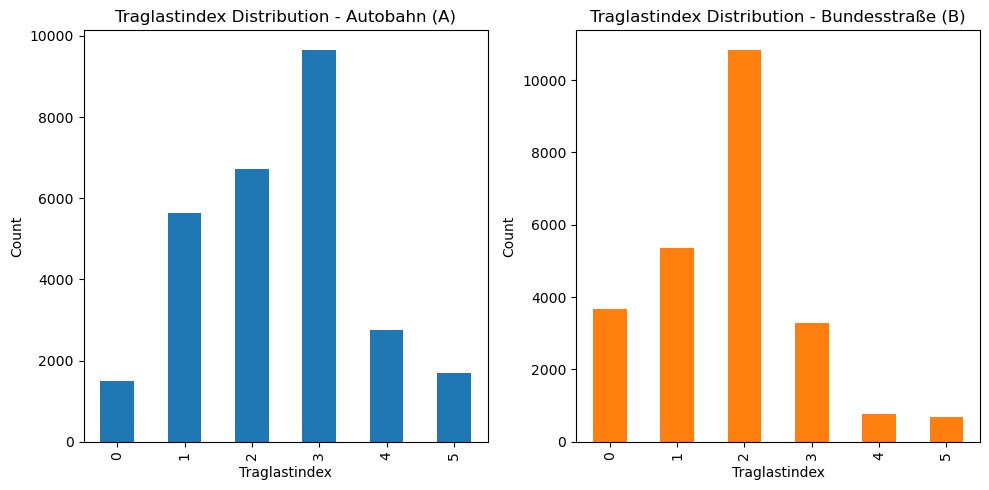

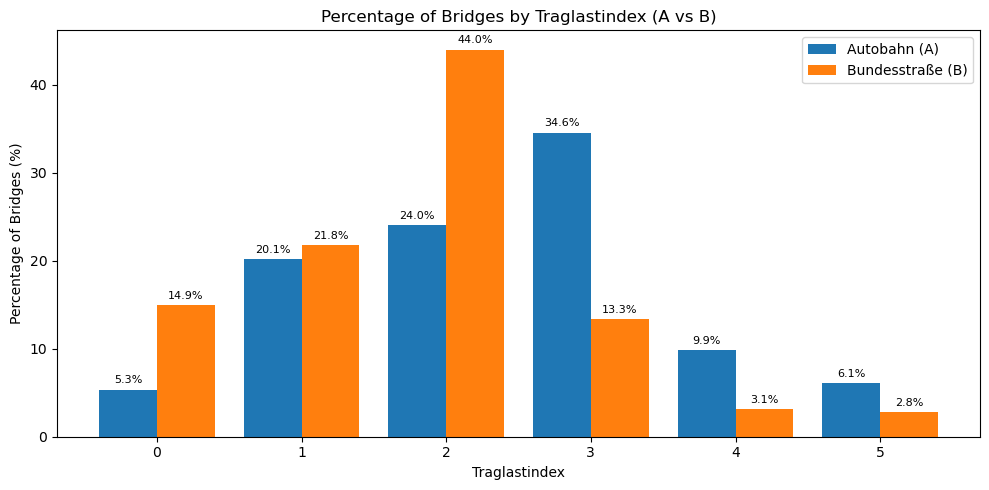

In [15]:
# plot Traglastindex for A and B separated

# filter rows with required values
df = data.dropna(subset=['Traglastindex','Zugeordneter Sachverhalt vereinfacht']).copy()

# split into A and B
df_A = df[df['Zugeordneter Sachverhalt vereinfacht'] == 'A']
df_B = df[df['Zugeordneter Sachverhalt vereinfacht'] == 'B']

# plot distribution of Baustoffklasse for A
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_A['Traglastindex'].value_counts().sort_index().plot(kind='bar', color='C0')
plt.xlabel('Traglastindex')
plt.ylabel('Count')
plt.title('Traglastindex Distribution - Autobahn (A)') 
# plot distribution of Baustoffklasse for B
plt.subplot(1,2,2)
df_B['Traglastindex'].value_counts().sort_index().plot(kind='bar', color='C1')
plt.xlabel('Traglastindex')
plt.ylabel('Count')
plt.title('Traglastindex Distribution - Bundesstraße (B)') 
plt.tight_layout()
plt.show()

# calculate the percentage of bridges for each Traglastindex
counts_index_A = df_A['Traglastindex'].value_counts(normalize=True) * 100
counts_index_B = df_B['Traglastindex'].value_counts(normalize=True) * 100

# plot those values as grouped bar plot
indices = sorted(set(counts_index_A.index).union(set(counts_index_B.index)))
x = np.arange(len(indices))
width = 0.4
plt.figure(figsize=(10,5))
plt.bar(x - width/2, [counts_index_A.get(i, 0) for i in indices], width, label='Autobahn (A)', color='C0')
plt.bar(x + width/2, [counts_index_B.get(i, 0) for i in indices], width, label='Bundesstraße (B)', color='C1')
plt.xticks(x, indices)
plt.xlabel('Traglastindex')
plt.ylabel('Percentage of Bridges (%)')
plt.title('Percentage of Bridges by Traglastindex (A vs B)')
# add numbers on top of bars
for i in range(len(indices)):
    plt.text(x[i] - width/2, (counts_index_A.get(indices[i], 0)) + 0.5, f"{counts_index_A.get(indices[i], 0):.1f}%", ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, (counts_index_B.get(indices[i], 0)) + 0.5, f"{counts_index_B.get(indices[i], 0):.1f}%", ha='center', va='bottom', fontsize=8)
plt.legend()    
plt.tight_layout()
plt.show()